In [ ]:
from matplotlib.image import imread
import os
image = imread(os.path.join('images', 'ladybug.png'))

In [ ]:
image.shape

In [ ]:
image[0][0]

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image)

In [ ]:
# Reshape the array to get a long list of RGB colors, then cluster these colors using K-Means

from sklearn.cluster import KMeans

X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8).fit(X)

In [ ]:
X

In [ ]:
sgemented_img = kmeans.cluster_centers_[kmeans.labels_]

In [ ]:
kmeans.labels_.shape

In [ ]:
kmeans.cluster_centers_

In [ ]:
sgemented_img

In [ ]:
sgemented_img = sgemented_img.reshape(image.shape)

In [ ]:
plt.imshow(sgemented_img)

In [ ]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

log_reg.score(X_test, y_test)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=99)),
    ('log_reg', LogisticRegression())
    ])

pipeline.fit(X_train, y_train)


In [ ]:
pipeline.score(X_test, y_test)

In [ ]:
kmeans = KMeans(n_clusters=99)

kmeans.fit(X_train, y_train)

y_pred = kmeans.transform(X_test)

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)

dbscan = DBSCAN(eps=0.2, min_samples=5)

dbscan.fit(X)

DBSCAN(eps=0.2)

In [ ]:
X

In [ ]:
dbscan.components_

In [ ]:
dbscan.labels_.shape

In [ ]:
dbscan.core_sample_indices_.shape

In [ ]:
dbscan.components_.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[ .core_sample_indices_])

In [2]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)

gm.fit(X)




GaussianMixture(n_components=3, n_init=10)

In [3]:
gm.weights_

array([0.58141621, 0.21118248, 0.20740131])

In [4]:
gm.means_

array([[ 0.50303718,  0.24581909],
       [-0.73150133,  0.57465289],
       [ 1.73300433, -0.06223082]])

In [6]:
gm.covariances_

array([[[ 0.16322856, -0.0936942 ],
        [-0.0936942 ,  0.28710244]],

       [[ 0.06058986,  0.06838958],
        [ 0.06838958,  0.09352239]],

       [[ 0.05643   ,  0.06345554],
        [ 0.06345554,  0.08794098]]])

In [58]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.05, random_state=40)


In [25]:
import matplotlib.pyplot as plt

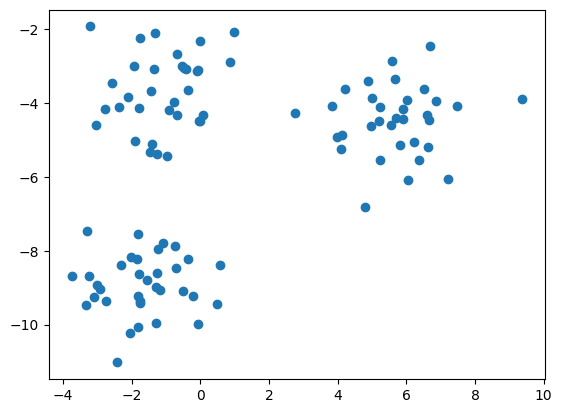

In [60]:
plt.scatter(X[:,0], X[:,1])

In [61]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)

gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [65]:
X_new, y_new = gm.sample(1000)

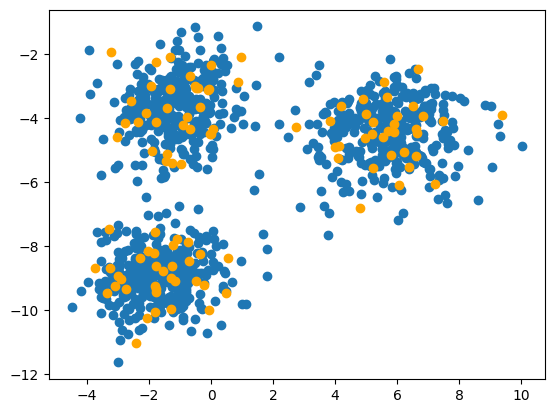

In [66]:
plt.scatter(X_new[:,0], X_new[:,1])
plt.scatter(X[:,0], X[:,1], c='orange')

In [67]:
# Generate a meshgrid of points to visualize the model's density:

import numpy as np

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.column_stack((xx.ravel(), yy.ravel()))

In [68]:
# Compute the density of the GMM at each point in the meshgrid:

density = np.exp(gm.score_samples(grid_points))
density = density.reshape(xx.shape)

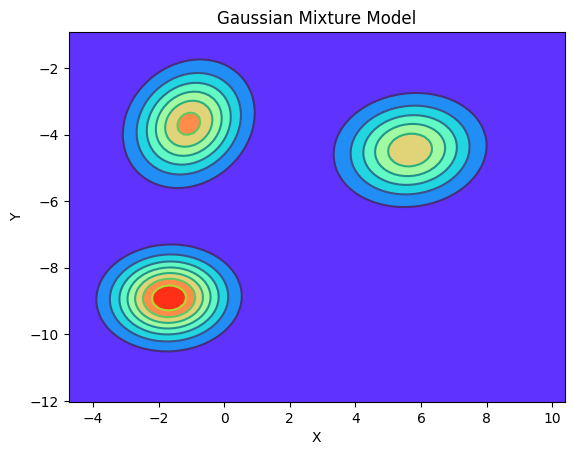

In [71]:
# Plot the GMM and data points:


plt.scatter(X[:, 0], X[:, 1], alpha=0.5)  # Scatter plot of the data points
plt.contour(xx, yy, density)  # Contour plot of the GMM density
plt.contourf(xx, yy, density, cmap='rainbow')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Mixture Model')
plt.show()